#**Sentiment distribution and Topic modeling result analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency


In [3]:
import os

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Change to the desired directory in Google Drive
os.chdir('/content/drive/My Drive/Colab Notebooks/Mental Health Depression Bertopic')

# Verify by listing files in the current directory
print(os.listdir())

Mounted at /content/drive
['data', 'my_model_dir', 'previous reddir small data', 'Depression Data Cleaning and Preprocess', 'DepressionRobertaSentimentAnalysis', 'doc_embedding.pickle', 'Topic_df_with_sentiments.csv', 'Topic_representation.csv', 'Topic_modeling_BERTopic.ipynb', 'Sentiment Dsitribution and Topic Analysis.ipynb']


In the original file "LIWC_Sentiment_topics.csv" is used. But it is not provided anywhere. We will use "Topic_df_with_sentiments.csv" instead

In [16]:
#Read data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mental Health Depression Bertopic/data/Topic_df_with_sentiments.csv')
topic_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mental Health Depression Bertopic/data/Topic_representation.csv')

In [17]:
df.head(2)

,ids,clean_text,topic,probs,sentiments,users,created_utc,negative,neutral,positive
0,0,understand people reply immediately op invitat...,0,0.993903,neutral,depression,0,0.123658,0.683168,0.193175
1,1,welcome r depression check post place take mom...,0,1.000000,neutral,depression,0,0.265393,0.642364,0.092243


In [18]:
print("Null values in data:",df.isna().sum().any())
print("shape of data:",df.shape)
print("\n")
print("Percentage of users in groups:",np.round(df.users.value_counts(normalize=True).mul(100),2))
print("\n")
print("number of unique users in groups:",df.groupby('users')['ids'].nunique())

Null values in data: False
shape of data: (7730, 10)


Percentage of users in groups: users
control       50.45
depression    49.55
Name: proportion, dtype: float64


number of unique users in groups: users
control       3900
depression    3830
Name: ids, dtype: int64


In [19]:
df['WC'] = df['clean_text'].str.split().str.len()

In [20]:
# average number of words per post and standard deviation for groups and overall
print("average number of words per posts for groups:","\n",
      df.groupby('users')['WC'].agg(['mean','std']))
print("\n")
print("average number of words per posts whole data:","\n",
      df['WC'].agg(['mean','std']))

average number of words per posts for groups: 
                  mean        std
users                           
control      7.849487   4.041673
depression  61.404178  82.039987


average number of words per posts whole data: 
 mean    34.384347
std     63.715511
Name: WC, dtype: float64


In [21]:
# average number of posts per user
print("average number of posts per user in groups","\n",
      df.groupby('ids')['users'].value_counts().reset_index().groupby('users')['count'].agg(['mean','std']))

average number of posts per user in groups 
             mean  std
users                
control      1.0  0.0
depression   1.0  0.0


In our data each post is assigned a unique id which is different than the original data used in the research paper.

#Sentiment Analysis

In [22]:
__temp = np.round(((df.groupby('users').sentiments.value_counts(normalize=True))*100),2).rename('percent')
__temp = __temp.reset_index()

__temp['users'] = __temp['users'].replace('clinical', 'depression')
__temp

,users,sentiments,percent
0,control,neutral,51.49
1,control,negative,34.49
2,control,positive,14.03
3,depression,negative,62.27
4,depression,neutral,31.36
5,depression,positive,6.37


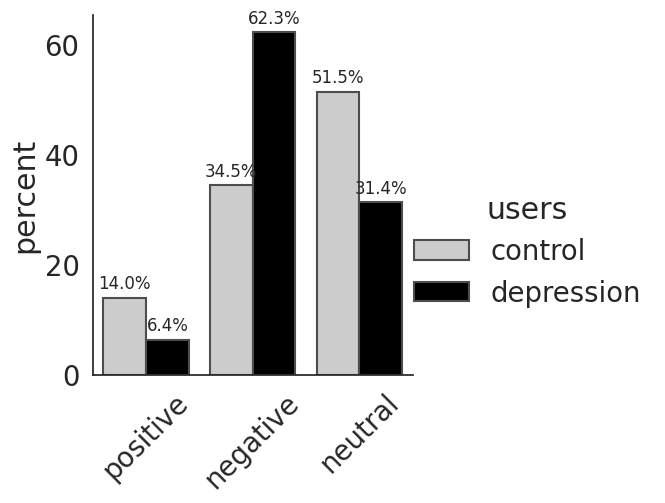

In [23]:
custom_grayscale_palette = ["#cccccc", "#000000"]

# Create a Seaborn plot with the custom grayscale palette
sns.set(style="white", palette=custom_grayscale_palette)
sns.set_context("notebook", font_scale=1.8)

# Create the catplot with the specified palette
g = sns.catplot(data=__temp, x='sentiments', y='percent', hue='users',
                kind='bar',linewidth=1.5,edgecolor=".3", palette=custom_grayscale_palette,
                order=["positive", "negative", "neutral"])
# Add percentage values on top of the bars with one-digit precision, skipping zero-height bars
for p in g.ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than zero
        g.ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Remove title and x-axis labels
g.fig.suptitle("")
g.set_xlabels("")

# Rotate the x-axis labels
g.set_xticklabels(rotation=45)  # Adjust rotation angle as needed

# Show the plot
plt.show()


##we can see the sentiment distribution differences between groups. Let's see the significance by performing a statistical chi-2 test:

In [25]:
# lets use the not-normalized numbers
print(df.groupby('users').sentiments.value_counts())
print("\n")
'''
data = [
    [93477, 53955, 47788],  # clinical
    [211969, 78225, 74189]  # control
]
'''
data = [
    [1201, 2385, 244],  # depression
    [2008, 1345, 547]  # control
]
# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(data)

chi2, p, dof, expected

print("Result of Chi2-test:")
print("chi2(2) =",chi2,"\n"
      "p-value =",p,"\n"
      "degree of freedom =",dof)

print('\n')

if p<0.001:
    print("the variation in sentiment distribution is statistically significant")
else:
    print("No significant difference")

users       sentiments
control     neutral       2008
            negative      1345
            positive       547
depression  negative      2385
            neutral       1201
            positive       244
Name: count, dtype: int64


Result of Chi2-test:
chi2(2) = 608.400722756916 
p-value = 7.71723384619591e-133 
degree of freedom = 2


the variation in sentiment distribution is statistically significant


#Topic analysis

In [26]:
print("Number of topics:",df.topic.nunique())

Number of topics: 85


In [27]:
df.groupby('users').topic.nunique()

,topic
users,
control,85
depression,77


In [28]:
topic_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,37,-1_snoo_ahhhhhhhhhhhhh_nomadicmatt_featherinair,"['snoo', 'ahhhhhhhhhhhhh', 'nomadicmatt', 'fea...","['depression', 'depressed', 'anxiety', 'feel',...","['depression', 'like', 'feel', 'day', 'work', ...",['idk guess vent something whatever lately eve...
1,0,1994,0_life_want_feel_wa,"['life', 'want', 'feel', 'wa', 'like', 'know',...","['depression', 'depressed', 'suicidal', 'care'...","['life', 'friend', 'feel like', 'think', 'fami...",['starter never really childhood wa parent wou...
2,1,843,1_anxiety_panic_attack_wa,"['anxiety', 'panic', 'attack', 'wa', 'like', '...","['anxiety attack', 'anxiety', 'panic attack', ...","['anxiety', 'panic', 'anxious', 'panic attack'...",['whole life dealt trifecta depression anxiety...
3,2,347,2_sleep_bed_awake_morning,"['sleep', 'bed', 'awake', 'morning', 'hour', '...","['sleep', 'need sleep', 'sleep sleep', 'sleepi...","['morning', 'woke', 'slept', 'going sleep', 't...","['cant sleep ugghhh', 'enough sleep', 'celeste..."
4,3,311,3_depression_co_battle_http,"['depression', 'co', 'battle', 'http', 'cure',...","['depression depression', 'depression', 'resul...","['hide depression', 'depression real', 'depres...","['rsk depression', 'depression arai', 'engysmo..."
...,...,...,...,...,...,...,...
80,79,25,79_mileycyrus_hahaha_nite_counting,"['mileycyrus', 'hahaha', 'nite', 'counting', '...","['mileycyrus', 'mile', 'cyrus', 'mile away', '...","['mileycyrus', 'mile', 'xoxo', 'cyrus', 'sick ...",['mileycyrus awww u seriously cutest dog miley...
81,80,21,80_facebook_apps_profile_view,"['facebook', 'apps', 'profile', 'view', 'dogbo...","['apps facebook', 'dogbook profile', 'profile ...","['facebook', 'facebook com', 'apps facebook', ...",['strider sick little puppy http apps facebook...
82,81,44,81_late_fb_deadline_spray,"['late', 'fb', 'deadline', 'spray', 'delayed',...","['deadline', 'late work', 'delayed', 'busy', '...","['deadline', 'mutt', 'spray paint', 'problem f...","['damn missed gsoc apply deadline', 'damn late..."
83,82,37,82_hate_comment_ohhh_boy,"['hate', 'comment', 'ohhh', 'boy', 'ride', 'up...","['hate', 'hating', 'dislike', 'strongly dislik...","['hate', 'money people', 'gave love', 'strongl...","['everyone hate much', 'never thought could ha..."


In [29]:
topic_df.drop(0,inplace=True)

In [31]:
#m = df.groupby('users').topic.value_counts(normalize=True).mul(100).reset_index()

In [34]:
m = df.groupby('users').topic.value_counts(normalize=True).reset_index()

In [35]:
m

,users,topic,proportion
0,control,2,0.081026
1,control,4,0.059487
2,control,0,0.050513
3,control,5,0.036154
4,control,11,0.026667
...,...,...,...
157,depression,48,0.000261
158,depression,27,0.000261
159,depression,55,0.000261
160,depression,56,0.000261


In [17]:
# m['users'] = m['users'].replace('clinical', 'depression')

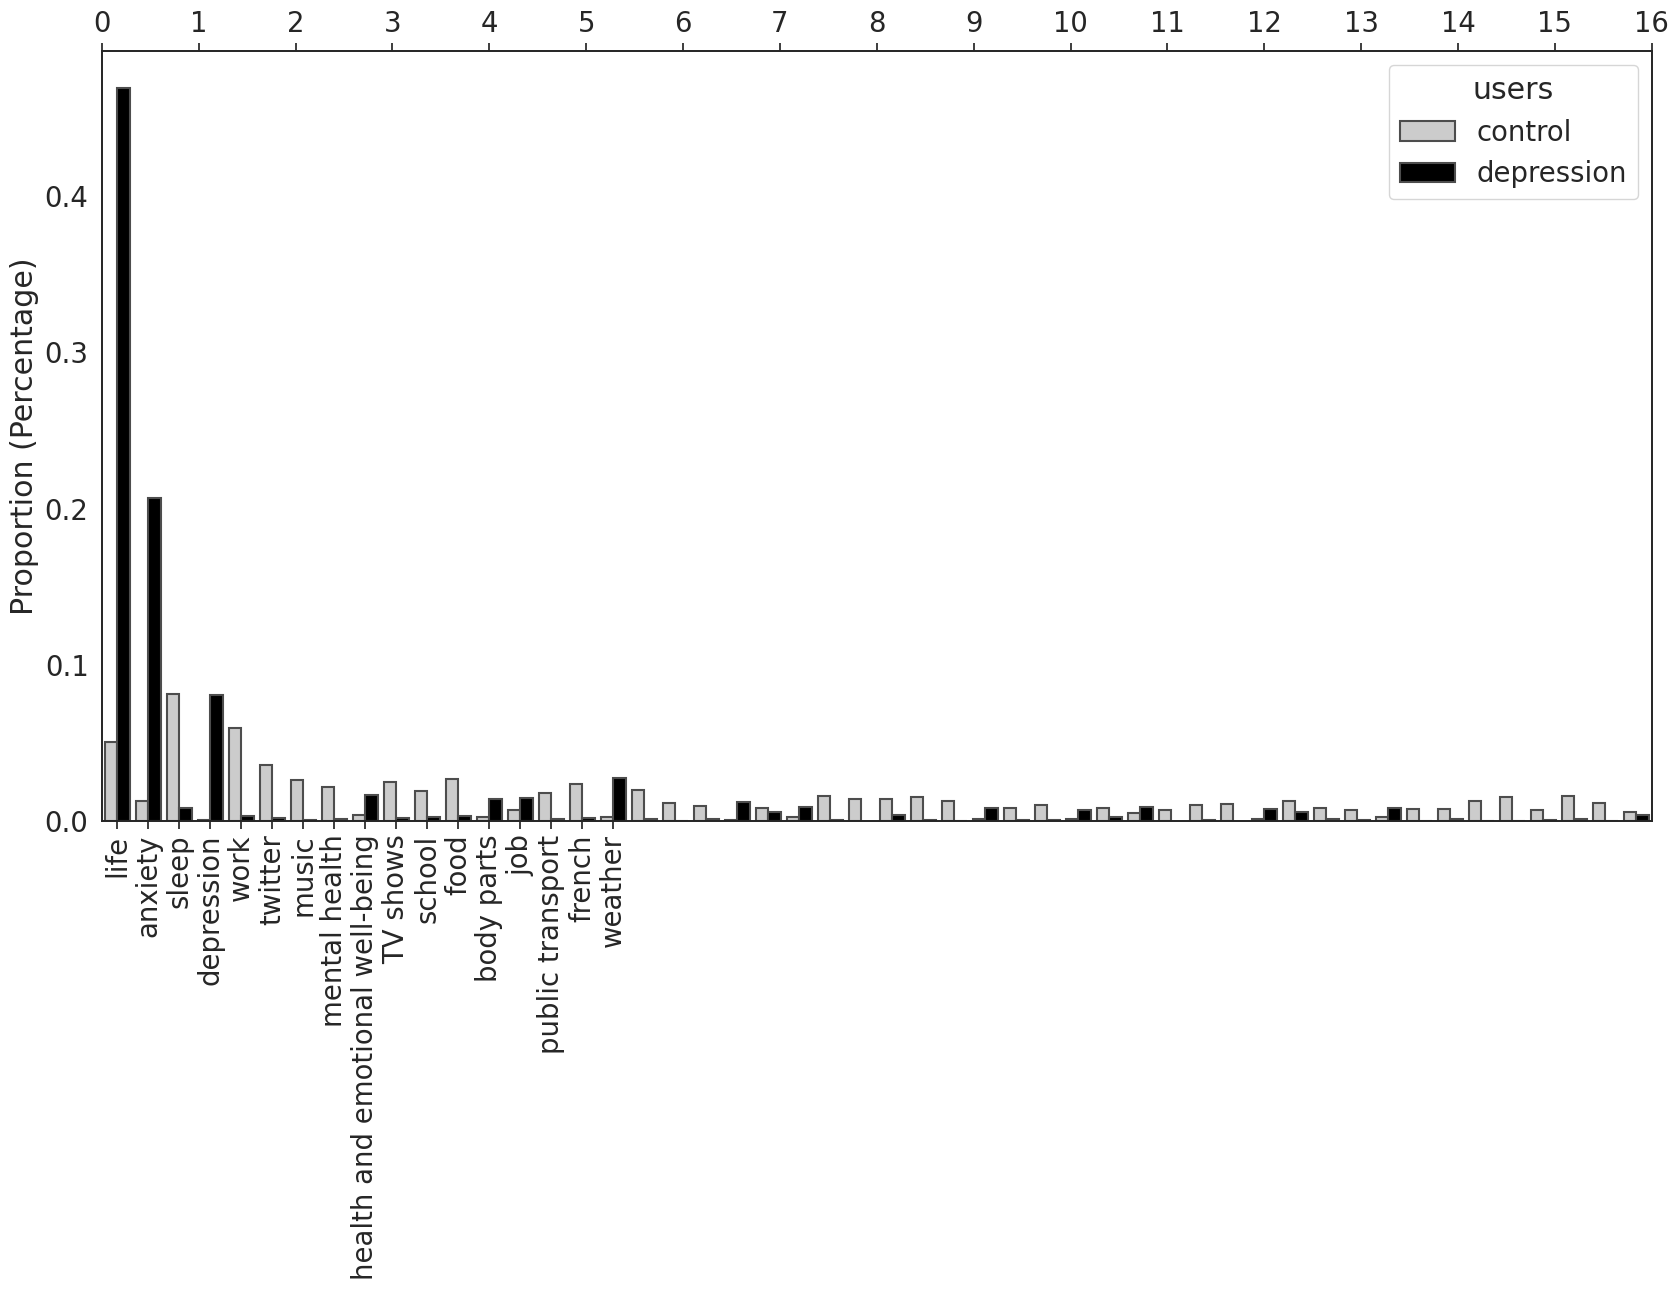

In [36]:
'''
topics_ = ["Animals","Relationships","Karambit","US elections","Diet","Colors","Ammunition","Books","Fantasy football",
"Reddit voting","Racism","Albums","Posts","Movies","Gym","Grooming","LGBTQ","Sports","Art",
"Cars","Medal","Devices","Football","Rocket League","Emotions","Tv series","Reddit interaction",
"Occurrences","Alcohol","Spanish","Pictures","Esports","Family","Sleep","USA","Shoes","Swedish",
"Laugh","Videogames","Gaming skills","Appreciation","Nightmare","Law","Reddit","Videos",
"Praise","Adult content","Smoking","Food","Internet slang"]
'''
topics_ = ["life","anxiety","sleep","depression","work","twitter","music","mental health",
               "health and emotional well-being","TV shows","school","food","body parts",
               "job","public transport","french","weather"]

data_m = m[(m['topic']<=49)]
data_m = data_m[(data_m['topic']!=-1)]
# Create bar plot
sns.set(rc={'figure.figsize': (20, 10)})
sns.set_style("white")
sns.set_context("notebook", font_scale=1.8)

ax = sns.barplot(x='topic', y='proportion', data=data_m, hue='users',linewidth=1.5,edgecolor=".3",
                 palette=custom_grayscale_palette)

# Set x-axis ticks and labels with different rotations
custom_ticks = list(range(len(topics_)))
ax.set_xticks(custom_ticks)
ax.set_xticklabels([])  # Clear the default x-axis labels

# Create a secondary x-axis for numbers
ax2 = ax.twiny()
ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_ticks, rotation=0, ha='center')

# Rotate and set x-axis labels as one-word representations
ax.set_xticklabels(topics_, rotation=90, ha='center')
# Remove x-axis label (sentiments)
ax.set_ylabel('Proportion (Percentage)')

# Remove x-axis label
ax.set_xlabel('')
ax2.set_xlabel('')# Save the figure in vector graphics format (PDF) with a transparent background
#plt.savefig("topic_distribution_font.pdf", format='pdf', transparent=True,bbox_inches="tight", pad_inches=0.1, dpi=300)


plt.show()

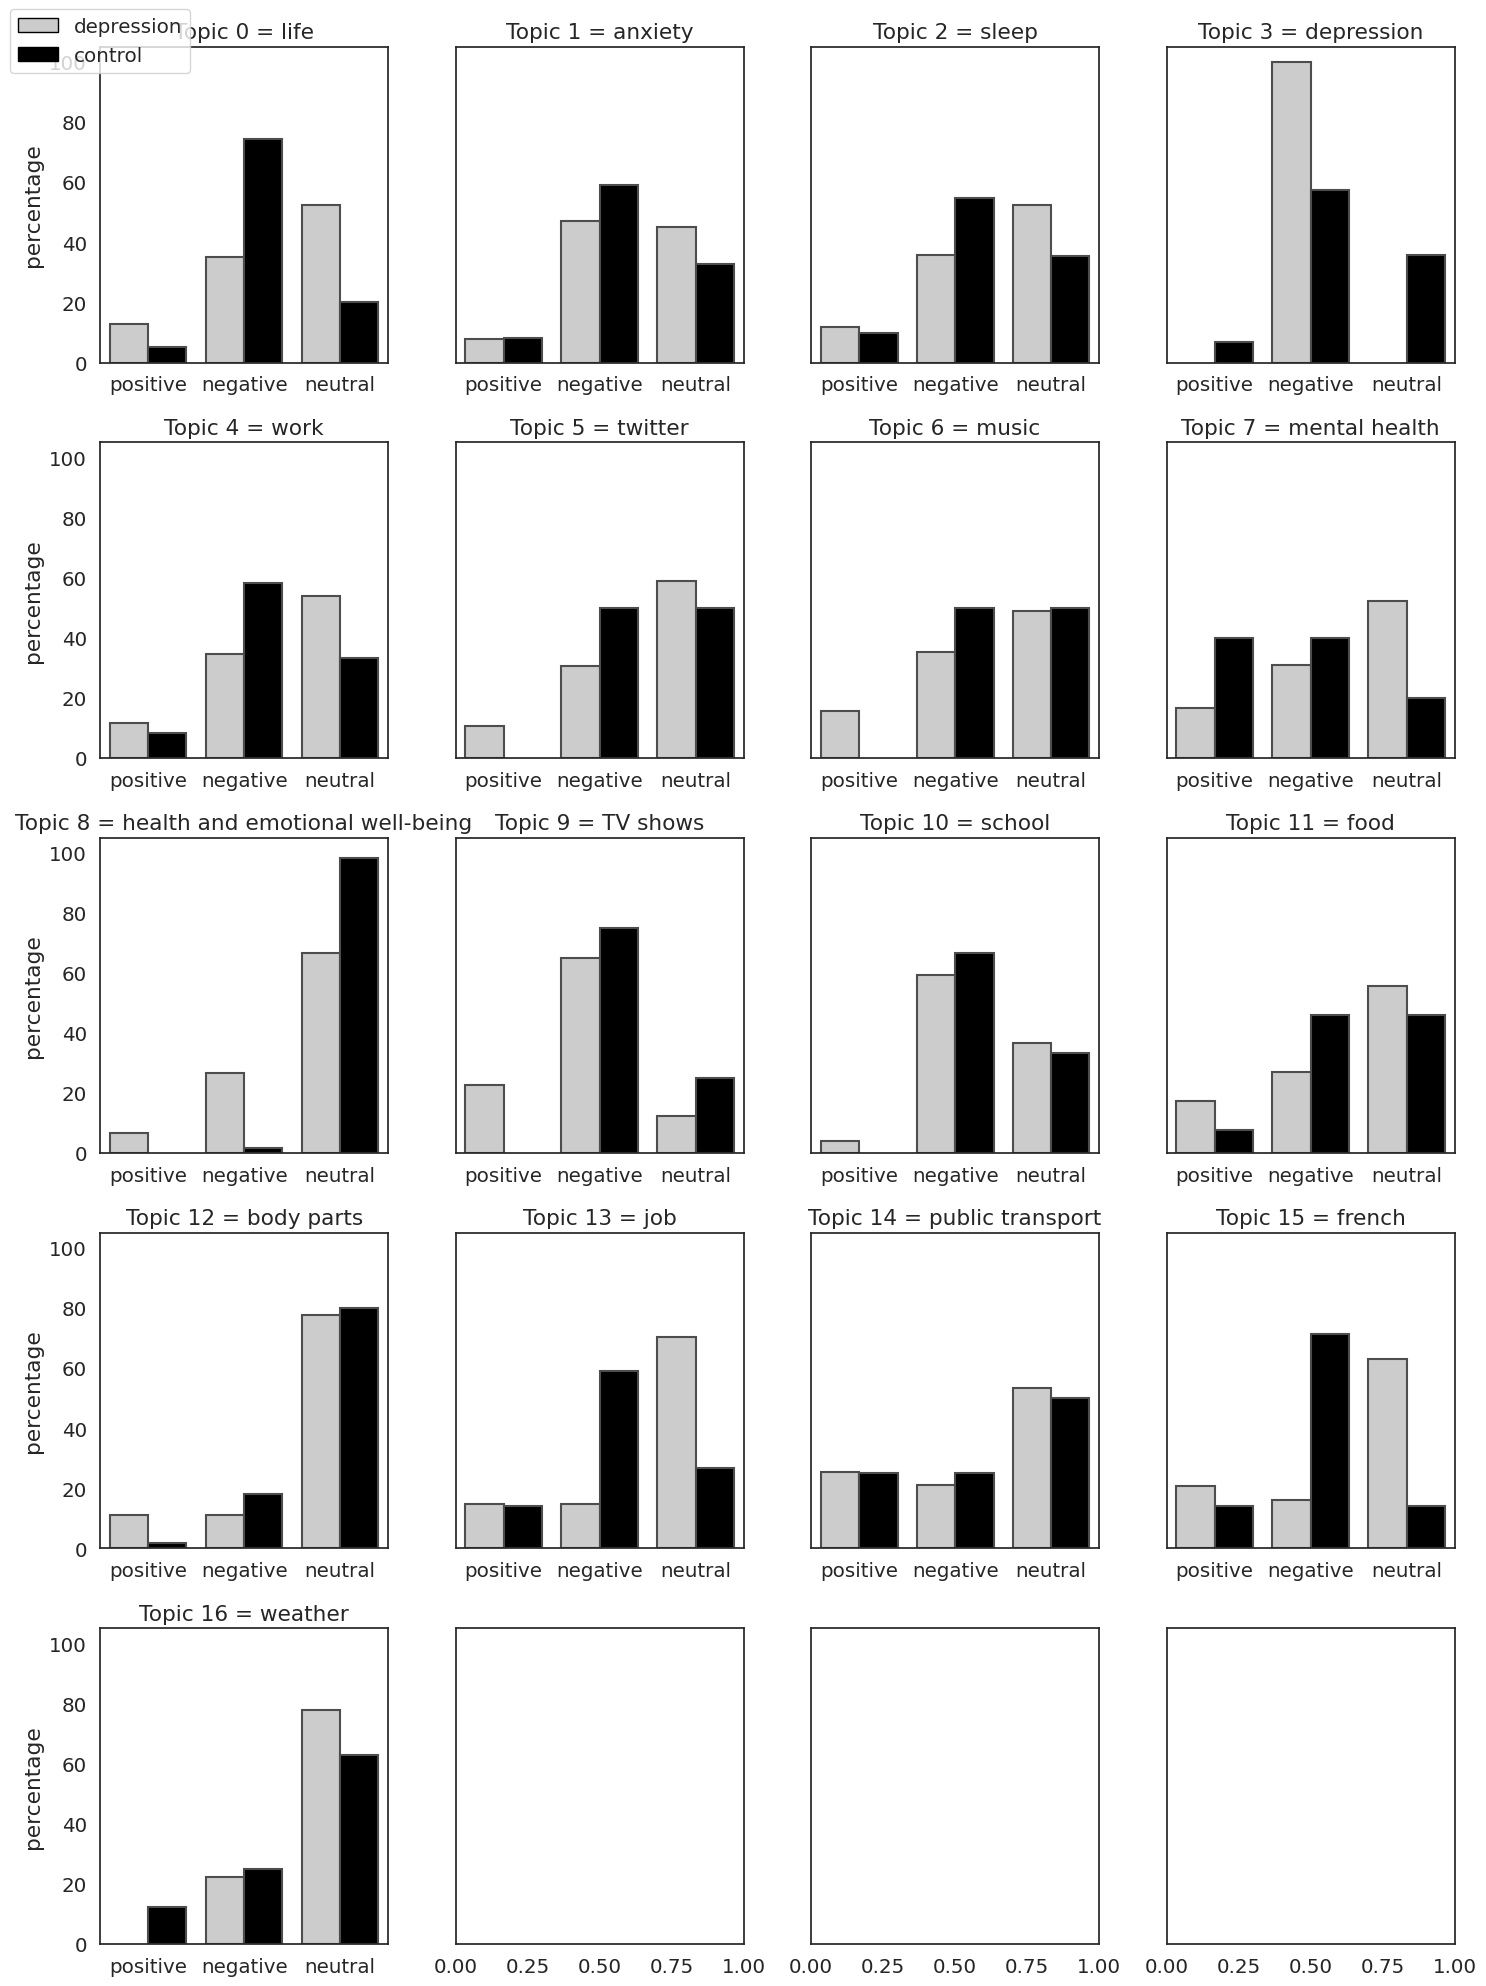

In [37]:
from matplotlib.patches import Rectangle

custom_grayscale_palette = ["#cccccc", "#000000"]
sns.set(style="white", palette=custom_grayscale_palette)

legend_labels = ['depression', 'control']
legend_colors = custom_grayscale_palette

sns.set_context("notebook", font_scale=1.3)

sentiments_percentage = df.groupby(['topic', 'users'])['sentiments'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

x = sentiments_percentage[sentiments_percentage['topic'].isin(range(17))]
'''
topics = ["Animals","Relationships","Karambit","US elections","Diet","Colors","Ammunition","Books","Fantasy football",
"Reddit voting","Racism","Albums","Posts","Movies","Gym","Grooming","LGBTQ","Sports","Art",
"Cars","Medal","Devices","Football","Rocket League","Emotions","Tv series","Reddit interaction",
"Occurrences","Alcohol","Spanish","Pictures","Esports","Family","Sleep","USA","Shoes","Swedish",
"Laugh","Videogames","Gaming skills","Appreciation","Nightmare","Law","Reddit","Videos",
"Praise","Adult content","Smoking","Food","Internet slang"]
'''
topics = ["life","anxiety","sleep","depression","work","twitter","music","mental health",
               "health and emotional well-being","TV shows","school","food","body parts",
               "job","public transport","french","weather"]

# Create subplots
fig, axes = plt.subplots(5, 4, figsize=(15, 20), sharey=True)
axes = axes.ravel()

for i, topic in enumerate(x['topic'].unique()):
    sns.barplot(
        data=x[x['topic'] == topic],
        x='sentiments',
        y='percentage',
        hue='users',
        ax=axes[i],
        order=['positive', 'negative', 'neutral'],linewidth=1.5,edgecolor=".3",
        palette=custom_grayscale_palette,
    )
    axes[i].set_title(f"Topic {topic} = {topics[topic]}")
    axes[i].set_xlabel(None)  # Remove x-axis label
    axes[i].legend().set_visible(False)  # Hide individual legends

# Create custom legend with rectangular box and outline
legend_elements = [
    Rectangle((0, 0), 1, 1, color=color, label=label) for label, color in zip(legend_labels, legend_colors)
]

# Set the outline for each legend rectangle
for rect in legend_elements:
    rect.set_edgecolor('black')
    rect.set_linewidth(1)

fig.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
#plt.savefig("top_50_topic_sentiment.pdf", format='pdf', transparent=True, bbox_inches="tight", pad_inches=0.1, dpi=300)

plt.show()